# Simple linear regression

# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
sns.set()

# Load the Data 

In [2]:
data = pd.read_csv("C:/Users/HP/Desktop/DATA SCI UPDATED/MACHINE LEARNING IN PYTHON/Compressed/machine-learning-in-python/Section 1/7_First regression in Python/Course notes/First regression in Python Dataset/1.01. Simple linear regression.csv")

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
#This method is used to give me the most useful statistics for each column in the dataset
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
#For this project, We have to variables SAT and GPA. We will create a linear regression which will predict GPA based on the sat score obtained

In [6]:
#Note
#why would i predict GPA with SAT?
# The sat is considered one of the best estimators of intellectual capacity and capability
#Almost all college across the USA are using the SAT as proxy for admission
# The SAt stood the test of time

# Create your first regression

# Define the dependent and independent variables 

In [7]:
#Recall that the model is y^ = b0 + b1x1
#Recall that the dependent variable is GPA

y = data['GPA']
x1 = data['SAT']

# Explore the data

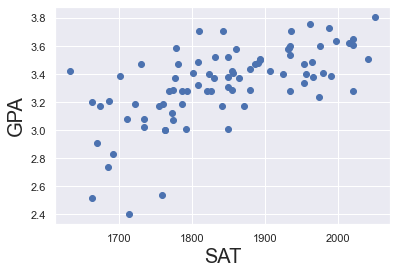

In [8]:
#Here we can plot the data so trhat we can explore it.
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

In [9]:
#We can observe that the higher the SAT of a student the higer the GPA

# Regression itself

In [10]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit() #Result will contain the output of the ordinary least saquares(ols) regression
results.summary()  #This will display the result and organize them into three tables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           7.20e-11
Time:                        03:56:10   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

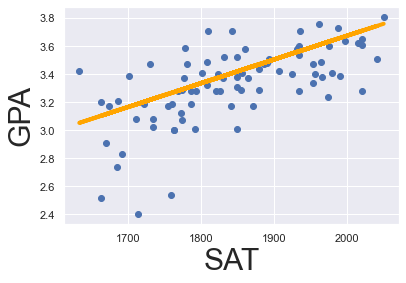

In [13]:
#Here we can plot the data so trhat we can explore it.
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.2750 
fig = plt.plot(x1, yhat, lw=4, c= 'orange', label = 'regression line')
plt.xlabel('SAT', fontsize=30)
plt.ylabel('GPA', fontsize=30)
plt.show()

In [14]:
#From the table of coefficient, b0 = 0.275
#b1 = 0.0017
#Hence, GPA = 0.275 + 0.0017 * SAT
#Standard error shows the accuracy of the model
# t statistic and its p value i.e P>|t| 
#The null hypothesis H0 : B = 0
#OLS which is the model used to estimate the regression
#R^2 = SSR/ SST (R^2  is a relative measure that takes values from 0 to 1) 
#An R^2 of 0 means that the regression explains none of the variability of the data while an R^2 of 1 means that
# the regressions explains the variabilty of the data
# Hence, the R-square measures the goodness of fit of the model
#The F-statistic follows the F distribution. The F-statistic is used for testing the overall significance of the model
#i.e for F-test H0:B1=B2=..=BK = 0 the alternative hypothesis is H1:Bi != 0 
#The interpretation of the F-statistic is that if all betas are 0, then none of the Xsmatter => our model has no merit
#Also, the lower the F-statistic, the closer the non-significant model.

# Using dummy variable


In [15]:
raw_data = pd.read_csv("C:/Users/HP/Desktop/DATA SCI UPDATED/MACHINE LEARNING IN PYTHON/Compressed/machine-learning-in-python/Section 1/22_Dealing with categorical data - Dummy variables/Course notes/Dummy variables Dataset/1.03. Dummies.csv")

In [16]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [18]:
data = raw_data.copy()

In [20]:
#This function will be used to convert the string to numbers
#I.e if the student attended the lecture (yes = 1) and if he/she did not attend the (NO = 0)
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [21]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [24]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [25]:
#The fact that the mean < 0.5 it means that there are more 0s than 1s which means that 46% of the students have attended 75% of the lessons

# Regression

In [26]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [28]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           2.19e-15
Time:                        05:33:48   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plotting the graph

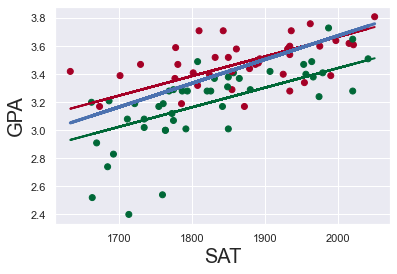

In [40]:
plt.scatter(data['SAT'],y, c=data['Attendance'], cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.2750 
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c= '#006837', label = 'regression line1')
fig = plt.plot(data['SAT'], yhat_yes, lw =2, c = '#a50026', label = 'regression line2')
fig = plt.plot(data['SAT'], yhat, lw=3, c='#4c72B0', label = 'regression line3')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# How to make prediction based on the regressions we create

In [41]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


# Data frame for the prediction

In [43]:
#Wwe will check two students
#1.Bob, who got  1700 on the SAT and did not attend classs
#2.Alice, who got 1670 on the SAT and attended class

new_data = pd.DataFrame({'const': 1, 'SAT': [1700,1670], 'Attendance': [0,1]})
#Here we specified the columns we want to display ourselves
new_data = new_data[['const','SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [44]:
new_data.rename(index = {0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [47]:
#This is the method that allows us to predict the value
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [48]:
#Now we transform it into a dataframe and oin it with the first one
predictionsdf = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictionsdf)
joined.rename({0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [ ]:
#Here, Alice scored lower in her SAT, but she attended > 75% of lectures and it is predicted that she will graduate with a GPA of 3.20416